# 02 Fundamentals of Time series
*This notebook illustrates methods to implement tasks using time series*
***
Alessandro Tufano, Ph.D. 2021

### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys; sys.path.insert(0, '..') #add the above level with the package
from analogistics import stat_time_series as ts

### Random generation of time series
Use a random number generator to create a time series

In [2]:
#Implementation of random functions to generate the time series
number_observations=50
x=np.arange(0,number_observations)
y1=x+3
y2=np.cos(x)*20
y3=np.random.randn(1, number_observations)

### Generation of an additive time series

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Value')

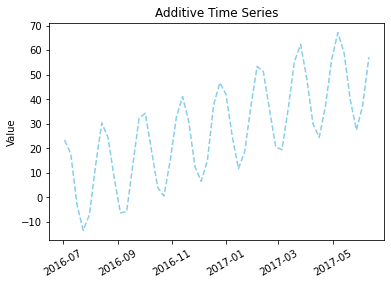

In [3]:
#create an additive time series
y=y1+y2+y3
y=np.transpose(y)
addSeries = pd.DataFrame(y, index = pd.date_range('7/1/2016',
                                                  freq='w',
                                                  periods=number_observations),
                         columns = ['Series'])

#plot the time series
plt.plot(addSeries.Series,'--',
         color='skyblue')
plt.xticks(rotation=30)
plt.title('Additive Time Series')
plt.ylabel('Value')

### Generation of a multiplicative time series

Text(0, 0.5, 'Value')

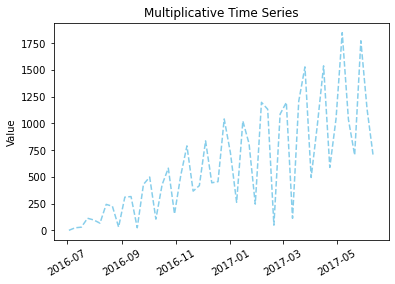

In [4]:
# multiplicative Time series
number_observations=50
x=np.arange(0,number_observations)
y1=x*2
y2=abs(np.cos(x)*20 + 1)
y3=1
y=y1*y2*y3
y=np.transpose(y)
mulSeries = pd.DataFrame(y, index = pd.date_range('7/1/2016', freq = 'w', periods = number_observations), columns = ['Series'])

plt.plot(mulSeries.Series,'k--',color='skyblue')
plt.xticks(rotation=30)
plt.title('Multiplicative Time Series')
plt.ylabel('Value')

### Comparison between additive and multiplicative TS

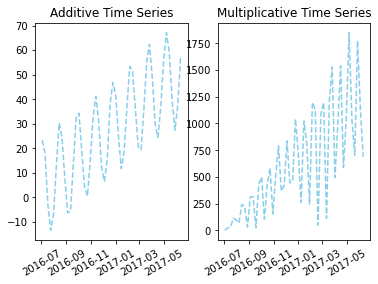

In [5]:
plt.subplot(121) 
plt.plot(addSeries.Series,'--',color='skyblue')
plt.xticks(rotation=30)
plt.title('Additive Time Series')
plt.subplot(122) 
plt.plot(mulSeries.Series,'k--',color='skyblue')
plt.xticks(rotation=30)
plt.title('Multiplicative Time Series')
plt.rcParams['figure.figsize'] = [20, 10] #[width height] #set figure size

### Definition of autocorrelation functions (ACF, PACF)

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\statsmodels\tsa\stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
..\analogistics\stat_time_series.py:213: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(lag_acf, linefmt='skyblue', markerfmt='d')
..\analogistics\stat_time_series.py:222: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  pl

(<matplotlib.axes._subplots.AxesSubplot at 0x1d216e7a240>,
 array([ 1,  2,  3,  5,  6,  7,  8, 11, 12, 13], dtype=int64),
 array([1, 2, 3, 4, 5, 7, 8], dtype=int64))

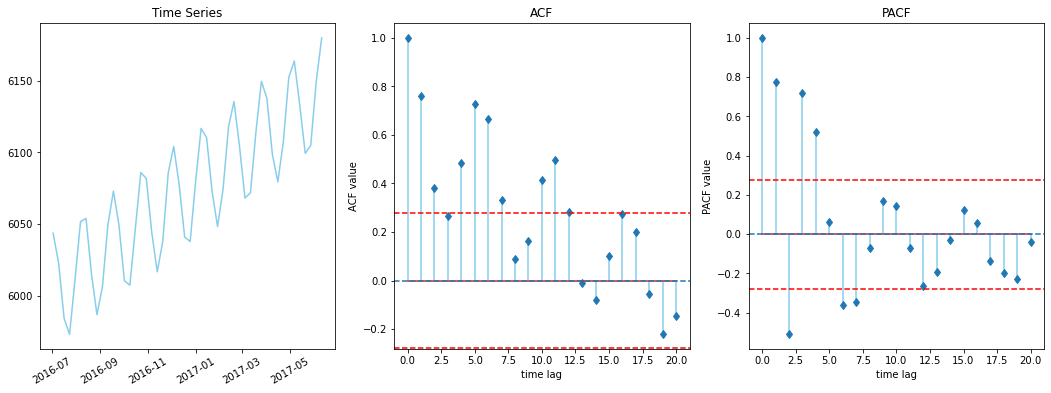

In [6]:
number_observations=50
x=np.arange(0,number_observations)
y1=x*2.8 + 4.3
y2=np.cos(20*x)*39
y3=np.random.randn(1, number_observations)


y=y1+y2+y3
y=np.transpose(y)
y=y+6000

addSeries = pd.DataFrame(y, index = pd.date_range('7/1/2016',
                                                  freq='w',
                                                  periods=number_observations),
                         columns = ['Series'])
plt.rcParams['figure.figsize'] = [18, 6] #[width height] #set figure size
ts.ACF_PACF_plot(addSeries)

### Time series decomposition

Text(0, 0.5, 'value')

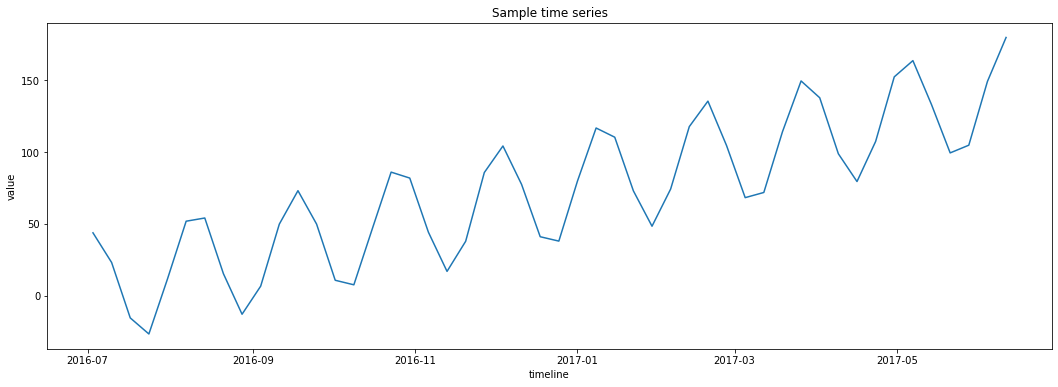

In [7]:
#Definition of the time series
y=y1+y2+y3
y=np.transpose(y)
addSeries = pd.DataFrame(y, index = pd.date_range('7/1/2016', freq = 'w', periods = number_observations), columns = ['Series'])
plt.plot(addSeries.index,addSeries.Series)
plt.title("Sample time series")
plt.xlabel('timeline')
plt.ylabel('value')

Text(0.5, 1.0, 'Residuals: seasonality + random')

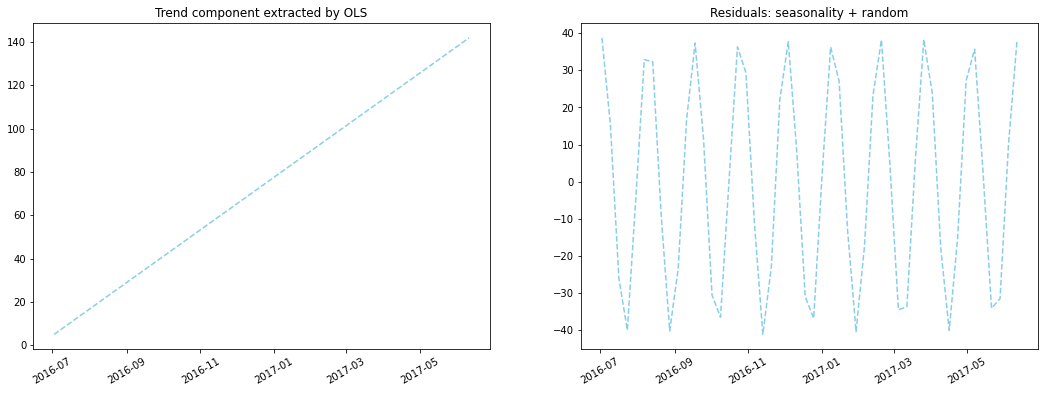

In [8]:
# Extract the trend component assuming it being linear
import sklearn.linear_model as lm #import 

regr = lm.LinearRegression()
x=x.reshape(-1,1)
y=y.reshape(-1,1)
lr=regr.fit(x,y)
y_pred=lr.predict(x)


# plot the trends and the residuals
plt.subplot(121) 
trend = pd.DataFrame(y_pred, index = pd.date_range('7/1/2016', freq = 'w', periods = number_observations), columns = ['Series'])
plt.plot(trend.Series,'k--',color='skyblue')
plt.xticks(rotation=30)
plt.title('Trend component extracted by OLS')

#traccio i residui
plt.subplot(122) 
residuals=y-y_pred
trend = pd.DataFrame(residuals, index = pd.date_range('7/1/2016', freq = 'w', periods = number_observations), columns = ['Series'])
plt.plot(trend.Series,'k--',color='skyblue')
plt.xticks(rotation=30)
plt.title('Residuals: seasonality + random')

Text(0.5, 1.0, 'Seasonal component - residuals')

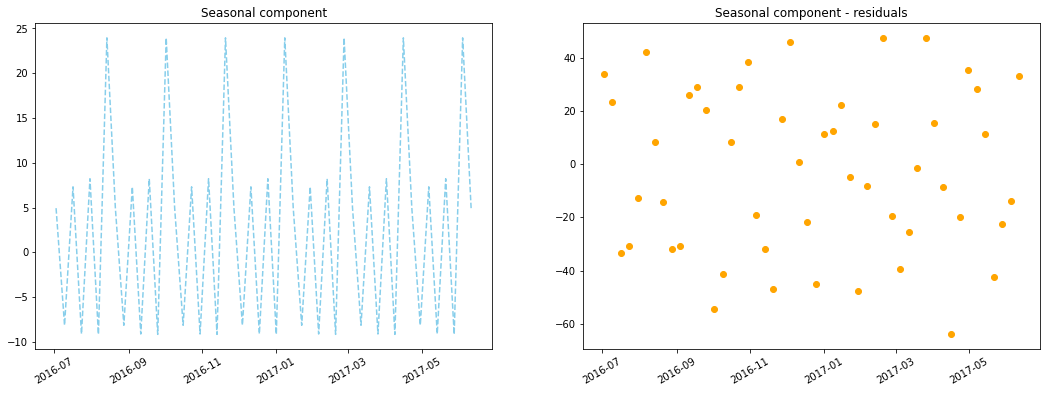

In [9]:
#extract the seasonal component with averaging
season_frequency=7
residuals_S=residuals

#fill using nan values
number_observations=len(y)
divisibile=season_frequency-number_observations%season_frequency
if divisibile!=0:
    for i in range(0,divisibile):
        residuals_S=np.append(residuals_S,np.nan)
        
numeroColonne= int(len(residuals_S)/season_frequency)  
residuals_S=residuals_S.reshape(season_frequency,numeroColonne)

season=np.nanmean(residuals_S, axis=1)
season=np.tile(season,numeroColonne)
for i in range(0,divisibile):
        season=season[0:-1]
        
plt.subplot(121) 
season = pd.DataFrame(season, index = pd.date_range('7/1/2016', freq = 'w', periods = number_observations), columns = ['Series'])
plt.plot(season.Series,'k--',color='skyblue')
plt.xticks(rotation=30)
plt.title('Seasonal component')  

#plot the residuals
plt.subplot(122) 
residuals=residuals-season
residuals = pd.DataFrame(residuals, index = pd.date_range('7/1/2016', freq = 'w', periods = number_observations), columns = ['Series'])
plt.scatter(residuals.Series.index,residuals.Series.values, marker='o',color='orange')
plt.xticks(rotation=30)
plt.title('Seasonal component - residuals') 

### Forecast a time series using ARIMA models

In [10]:
#generate the time series
number_observations=50
x=np.arange(0,number_observations)
y1=0.2*x+3
y2=np.cos(0.005*x)*20
y3=np.random.randn(1, number_observations)

y=y1+y2+y3
y=np.transpose(y)
#y=y+6000
addSeries = pd.DataFrame(y, index = pd.date_range('7/1/2016', freq = 'w', periods = number_observations), columns = ['Series'])


C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\statsmodels\tsa\stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
..\analogistics\stat_time_series.py:213: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(lag_acf, linefmt='skyblue', markerfmt='d')
..\analogistics\stat_time_series.py:222: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  pl

(<matplotlib.axes._subplots.AxesSubplot at 0x1d2172fecf8>,
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64),
 array([ 1,  2,  3, 18, 21], dtype=int64))

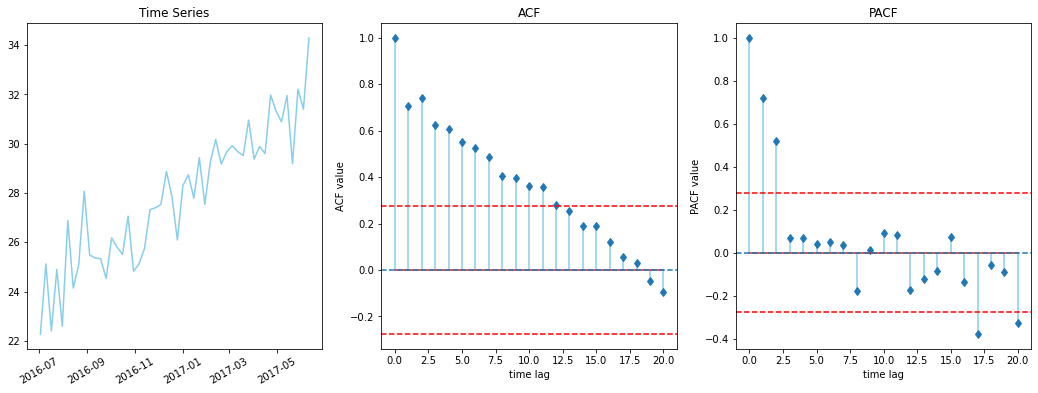

In [11]:
#represent ACF and PACF
plt.rcParams['figure.figsize'] = [18, 6] #[width height] #set figure size
ts.ACF_PACF_plot(addSeries)

### Detrend the series

In [12]:
#detrend the series
from statsmodels.tsa.stattools import adfuller
regr = lm.LinearRegression()
x=x.reshape(-1,1)
y=y.reshape(-1,1)
lr=regr.fit(x,y)
y_pred=lr.predict(x)
residuals=y-y_pred
residuals=residuals-min(residuals)
residuals=pd.DataFrame(residuals, index = pd.date_range('7/1/2016', freq = 'w', periods = number_observations), columns = ['Series'])




ADF Statistic: -8.707211
p-value: 0.000000
Critical Values:
	1%: -3.571
	5%: -2.923
	10%: -2.599
The series is stationary


C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\statsmodels\tsa\stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
..\analogistics\stat_time_series.py:213: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(lag_acf, linefmt='skyblue', markerfmt='d')
..\analogistics\stat_time_series.py:222: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  pl

(<matplotlib.axes._subplots.AxesSubplot at 0x1d2170f5dd8>,
 array([1], dtype=int64),
 array([ 1, 15, 18, 19], dtype=int64))

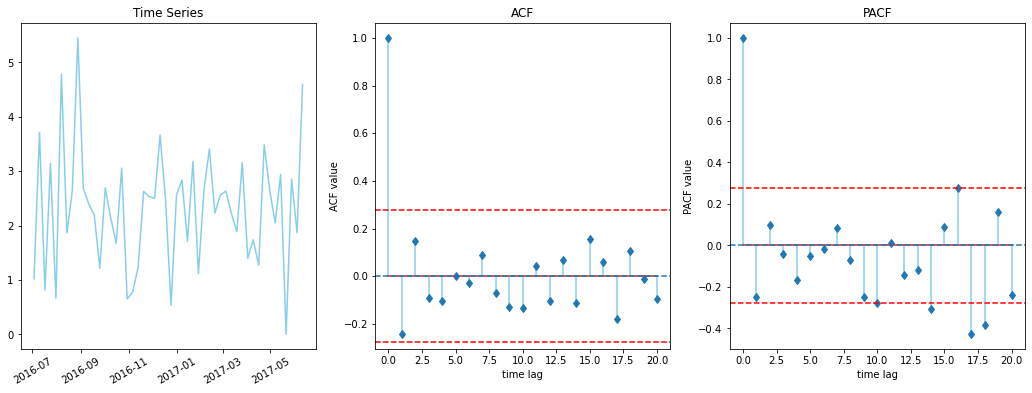

In [13]:
#check the series for stationarity
result=adfuller(residuals.iloc[:,0].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
if result[1]<0.05:
    print('The series is stationary')
else:
    print('The series is not stationary')
    
ts.ACF_PACF_plot(residuals)

### Use transformation for stationarity

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\statsmodels\tsa\stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
..\analogistics\stat_time_series.py:213: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(lag_acf, linefmt='skyblue', markerfmt='d')
..\analogistics\stat_time_series.py:222: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  pl

(<matplotlib.axes._subplots.AxesSubplot at 0x1d2170f99e8>,
 array([1], dtype=int64),
 array([ 1, 18, 19, 21], dtype=int64))

<Figure size 1296x432 with 0 Axes>

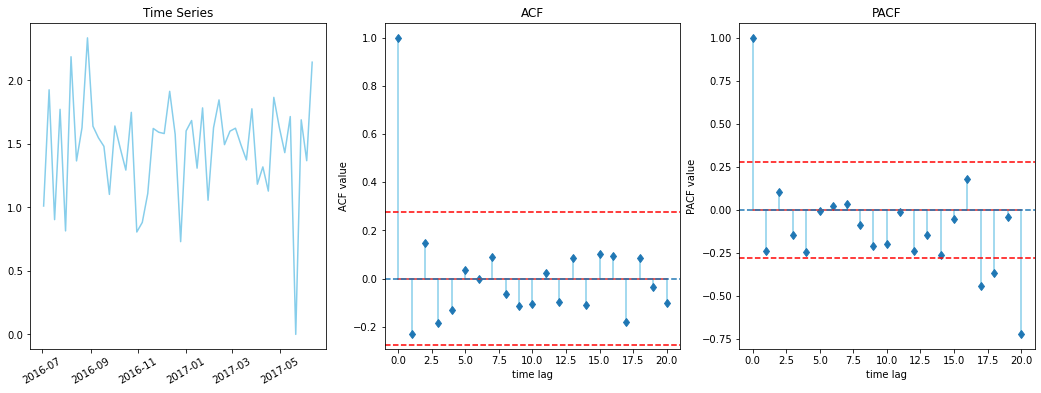

In [14]:
#power or log transformation to make the series stationary
log_series = residuals.apply(lambda x: x**.5)
plt.figure()
log_series.plot()


ts.ACF_PACF_plot(log_series)

In [15]:
#test for stationarity
result=adfuller(log_series.iloc[:,0].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
if result[1]<0.05:
    print('The series is stationary')
else:
    print('The series is not stationary')

ADF Statistic: -4.460601
p-value: 0.000232
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602
The series is stationary


### Build the ARIMA model

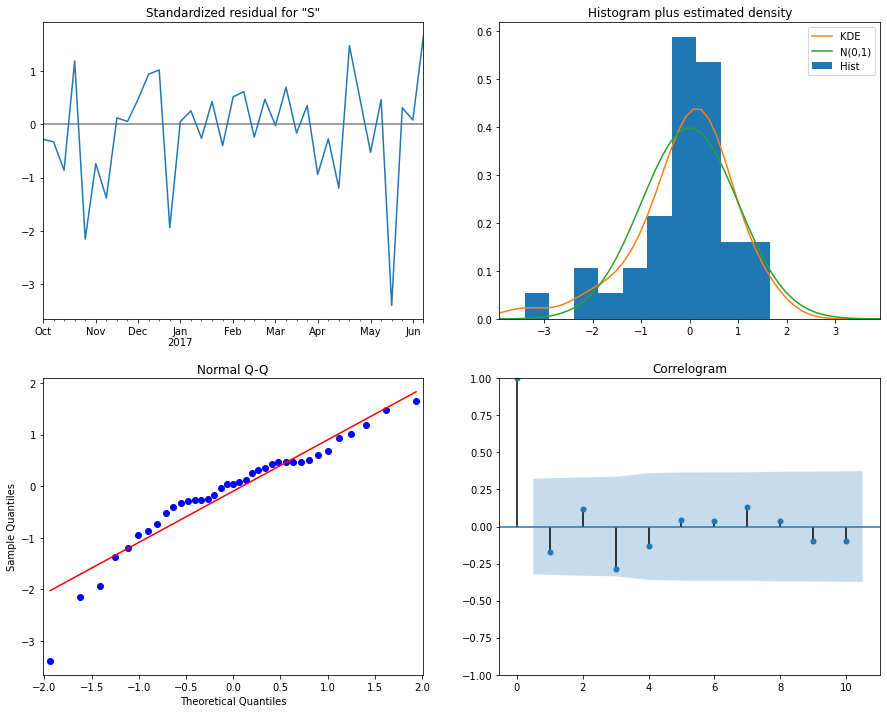

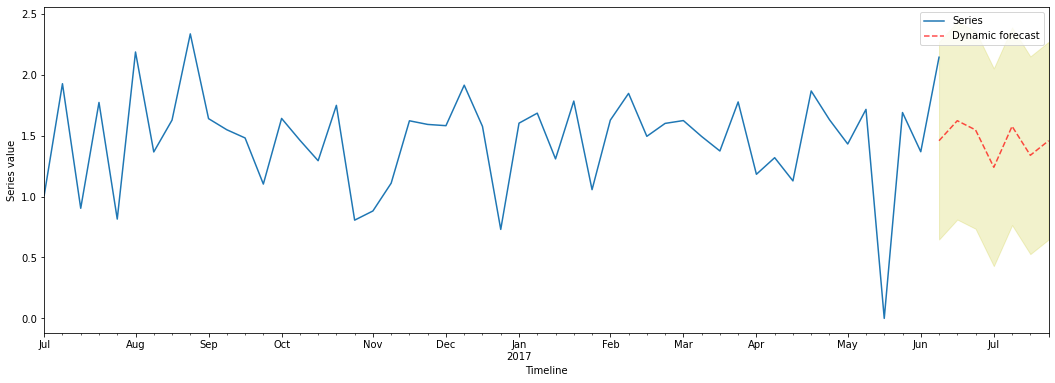

In [16]:
# In[1]: apply ARIMA
addSeries=log_series
result=ts.autoSARIMAXfit(addSeries,0,2,6)
results=result.fit()
results.plot_diagnostics(figsize=(15, 12))
plt.show()


pred = results.get_prediction(start=len(addSeries)-1,end=len(addSeries)+5, dynamic=True)
pred_ci = pred.conf_int()

ax = addSeries.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Dynamic forecast', color='r', style='--', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='y', alpha=.2)

ax.set_xlabel('Timeline')
ax.set_ylabel('Series value')
plt.legend()

plt.show()

### Use Fourier analysis to detect seasonality

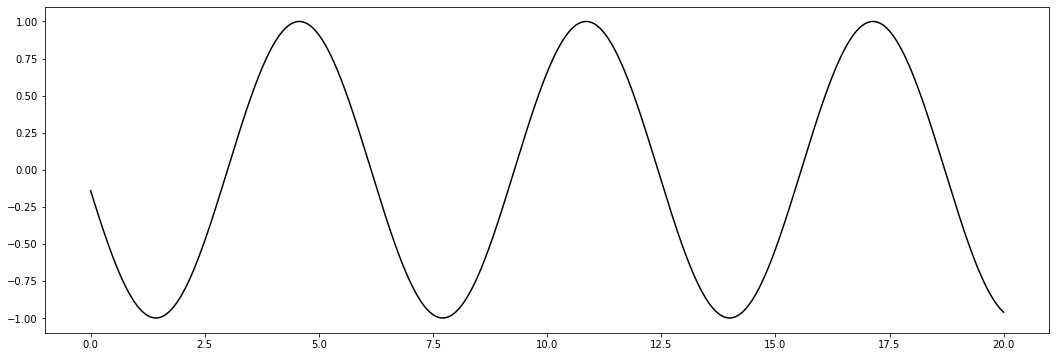

In [17]:
#example of a periodic signal
x=np.linspace(0,20,10000)
y=np.sin(x-3)
plt.plot(x,y,'k')

Text(0.5, 1.0, 'Samples')

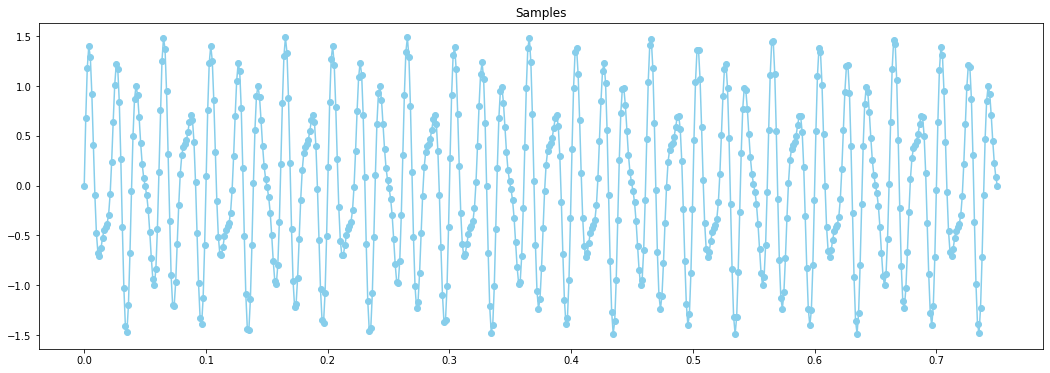

In [18]:
#define a signal
N=600
T = 1.0 / 800.0
x=np.linspace(0,N*T,N)
y=np.sin(50*2*np.pi*x)+0.5*np.sin(80*2*np.pi*x)


#plot samples (Figure 19)
plt.plot(x,y,color='skyblue',marker='o')
plt.title('Samples')




Text(0.5, 1.0, 'Amplitude spectrum')

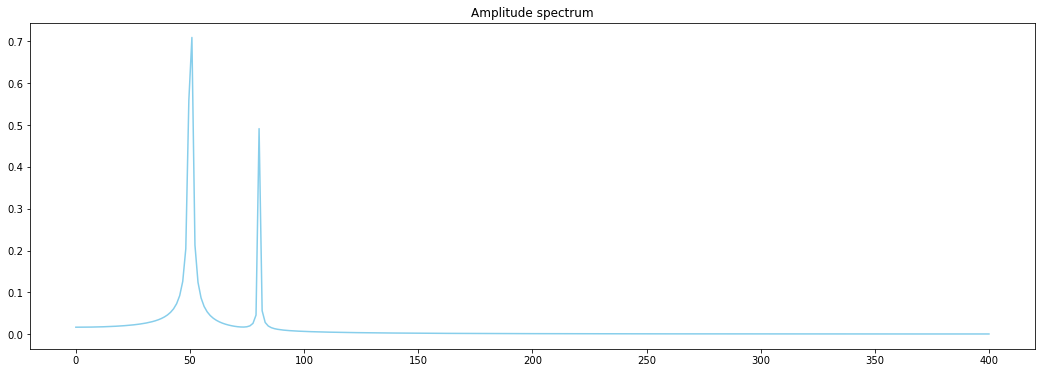

In [19]:
#compute the Fourier Transform
from scipy.fftpack import fft



plt.figure()
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

#plot fft
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]),color='skyblue')
plt.title('Amplitude spectrum')

In [20]:
ts.fourierAnalysis(addSeries.Series.values)


,Frequency_domain_value,Time_domain_value,Amplitude,perc,cumsum
19,0.395833,2.526316,0.220471,0.096331,0.096331
23,0.479167,2.086957,0.210224,0.091854,0.188185
24,0.500000,2.000000,0.205087,0.089609,0.277795
7,0.145833,6.857143,0.198168,0.086586,0.364381
9,0.187500,5.333333,0.154040,0.067305,0.431687
16,0.333333,3.000000,0.138614,0.060565,0.492252
22,0.458333,2.181818,0.131612,0.057506,0.549758
2,0.041667,24.000000,0.130270,0.056920,0.606677
14,0.291667,3.428571,0.128726,0.056245,0.662922
10,0.208333,4.800000,0.099248,0.043365,0.706287


## Search attractors in a time series

Use the Lorenz attractor as an example

In [21]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s * (y - x)
    y_dot = r * x - y - x * z
    z_dot = x * y - b * z
    return x_dot, y_dot, z_dot

In [22]:
dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

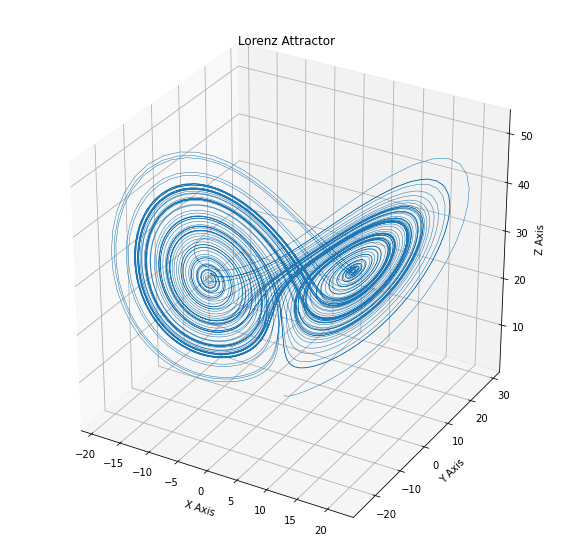

In [23]:
# Plot
fig = plt.figure(figsize=[10, 10])
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

True

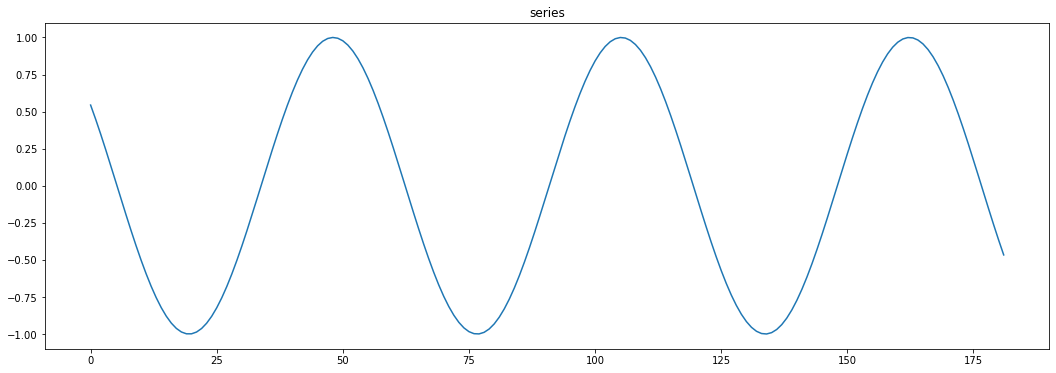

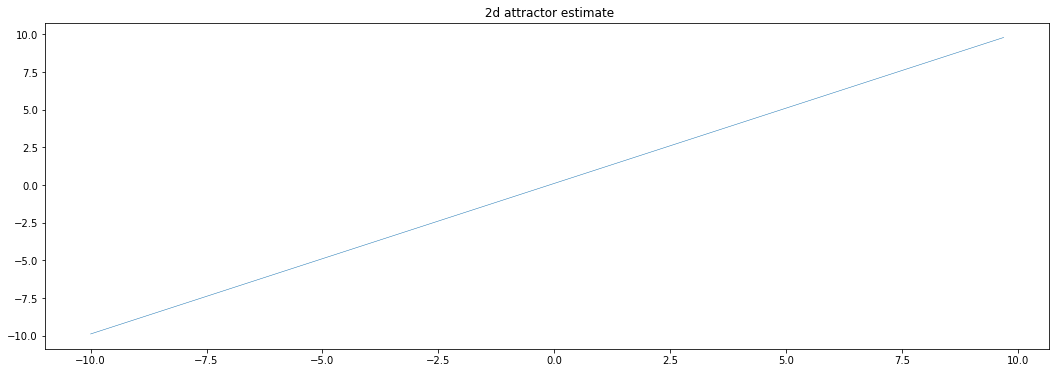

In [24]:
# Use the estimat eof the attractor on the sin function
x = list(np.arange(-10, 10, 0.11))
y = np.sin(x)
plt.figure()
plt.plot(y)
plt.title('series')

ts.attractor_estimate(x, dim='2d')


(    x_coord  y_coord  value_to_predict  \
 0     -8.90   -10.00             -8.79   
 1     -8.79    -9.89             -8.68   
 2     -8.68    -9.78             -8.57   
 3     -8.57    -9.67             -8.46   
 4     -8.46    -9.56             -8.35   
 ..      ...      ...               ...   
 84     0.34    -0.76              0.45   
 85     0.45    -0.65              0.56   
 86     0.56    -0.54              0.67   
 87     0.67    -0.43              0.78   
 88     0.78    -0.32              0.89   
 
                                          PoincareMaps  
 0   [[[255, 255, 255], [255, 255, 255], [255, 255,...  
 1   [[[255, 255, 255], [255, 255, 255], [255, 255,...  
 2   [[[255, 255, 255], [255, 255, 255], [255, 255,...  
 3   [[[255, 255, 255], [255, 255, 255], [255, 255,...  
 4   [[[255, 255, 255], [255, 255, 255], [255, 255,...  
 ..                                                ...  
 84  [[[255, 255, 255], [255, 255, 255], [255, 255,...  
 85  [[[255, 255, 255], [2

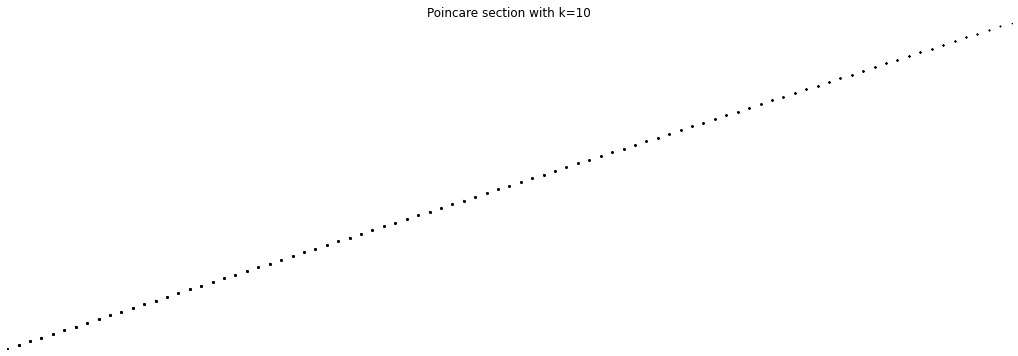

In [25]:
# calculate the Poincare Section of sin function
ts.poincare_section(x[0:100], T=10, num_of_dots_on_picture=100)

True

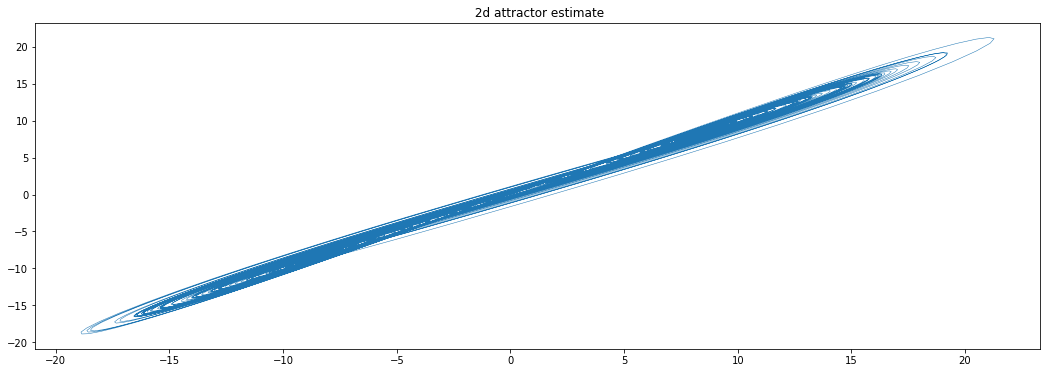

In [26]:
# Use the attractore estimate with the Lorenz attractor -2d projection
ts.attractor_estimate(xs, dim='2d')

True

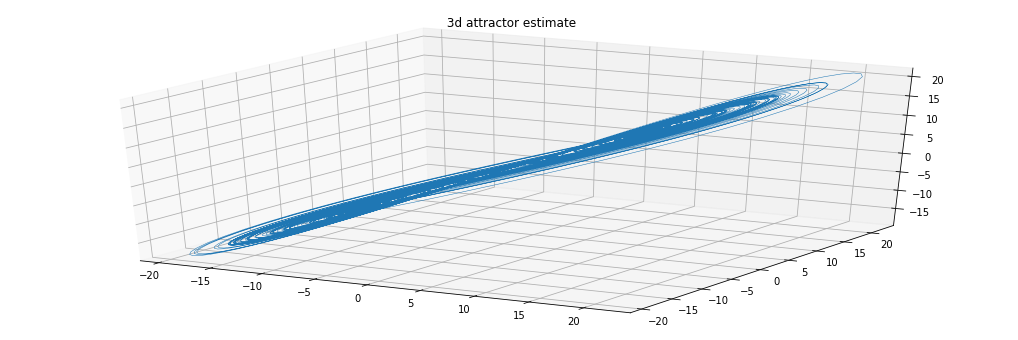

In [27]:
# Use the attractore estimate with the Lorenz attractor -3d projection
ts.attractor_estimate(xs, dim='3d')

(     x_coord   y_coord  value_to_predict  \
 0   0.852221  0.000000          0.958567   
 1   0.958567  0.100000          1.075500   
 2   1.075500  0.189000          1.204642   
 3   1.204642  0.270808          1.347710   
 4   1.347710  0.348532          1.506548   
 ..       ...       ...               ...   
 84 -3.668908 -5.672106         -3.602048   
 85 -3.602048 -5.360143         -3.556779   
 86 -3.556779 -5.071422         -3.532290   
 87 -3.532290 -4.807360         -3.527838   
 88 -3.527838 -4.568784         -3.542769   
 
                                          PoincareMaps  
 0   [[[255, 255, 255], [255, 255, 255], [255, 255,...  
 1   [[[255, 255, 255], [255, 255, 255], [255, 255,...  
 2   [[[255, 255, 255], [255, 255, 255], [255, 255,...  
 3   [[[255, 255, 255], [255, 255, 255], [255, 255,...  
 4   [[[255, 255, 255], [255, 255, 255], [255, 255,...  
 ..                                                ...  
 84  [[[255, 255, 255], [255, 255, 255], [255, 255,...  
 8

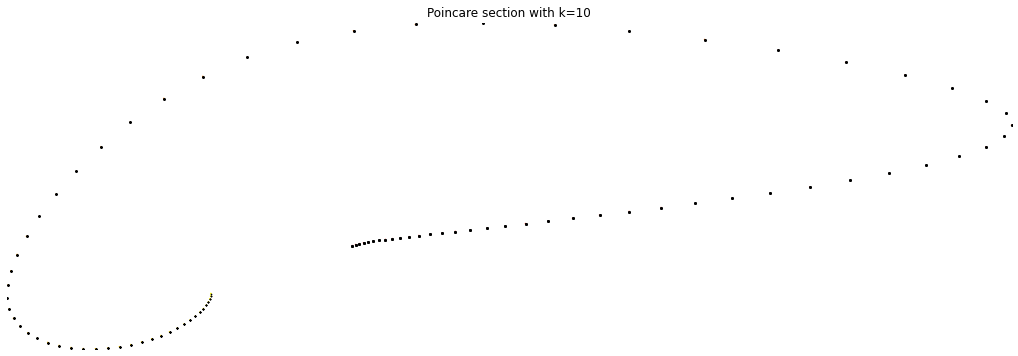

In [28]:
# calculate the Poincare Section of the Lorenz attractor
ts.poincare_section(xs[0:100], T=10, num_of_dots_on_picture=100)